In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from scipy import stats

In [2]:
path = Path("dataset/311_Service_Requests_2024.csv")
df = pd.read_csv(path)
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])

# Styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

**Hypothesentests**

H0 = Die Aircraft Noise Complaints sind gleich verteilt über die Woche.

H1 = Sie sind nicht gleichverteilt.

In [20]:
aircraft_df = df[df['SR_TYPE'] == 'Aircraft Noise Complaint'].copy()
aircraft_df['Wochentag'] = aircraft_df['CREATED_DAY_OF_WEEK']

# Observed counts
observed = aircraft_df['Wochentag'].value_counts().sort_index().values
n_total = observed.sum()
n_days = 7

# Expected counts (Gleichverteilung)
expected = np.array([n_total / n_days] * n_days)

print(f"""
Daten:
------
Gesamtanzahl: {n_total}
Erwartete Anzahl pro Tag (bei H₀): {expected[0]:.1f}
""")

aircraft_df.head()
aircraft_df.nunique()


Daten:
------
Gesamtanzahl: 343797
Erwartete Anzahl pro Tag (bei H₀): 49113.9



SR_NUMBER                   343797
SR_TYPE                          1
SR_SHORT_CODE                    1
CREATED_DEPARTMENT               2
OWNER_DEPARTMENT                 1
STATUS                           1
ORIGIN                           4
CREATED_DATE                342038
LAST_MODIFIED_DATE           29497
CLOSED_DATE                 341973
STREET_ADDRESS                  40
CITY                             1
STATE                            1
ZIP_CODE                        17
STREET_NUMBER                   38
STREET_DIRECTION                 3
STREET_NAME                     36
STREET_TYPE                      5
DUPLICATE                        1
LEGACY_RECORD                    1
LEGACY_SR_NUMBER                 0
PARENT_SR_NUMBER                 0
COMMUNITY_AREA                  22
WARD                            18
ELECTRICAL_DISTRICT              0
ELECTRICITY_GRID                36
POLICE_SECTOR                    4
POLICE_DISTRICT                 10
POLICE_BEAT         


Teststatistik:
--------------
χ² = 5779.81
Freiheitsgrade: df = 6
p-Wert: 0.0000

Interpretation (α = 0.05):
--------------------------

✓ p < 0.05 → H₀ VERWERFEN
  Die Aircraft Noise Complaints sind NICHT gleichverteilt über die Woche.
  Statistisch signifikanter Unterschied zwischen den Wochentagen.


C:\Users\katha\AppData\Local\Temp\ipykernel_12528\34362990.py:40: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\katha\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


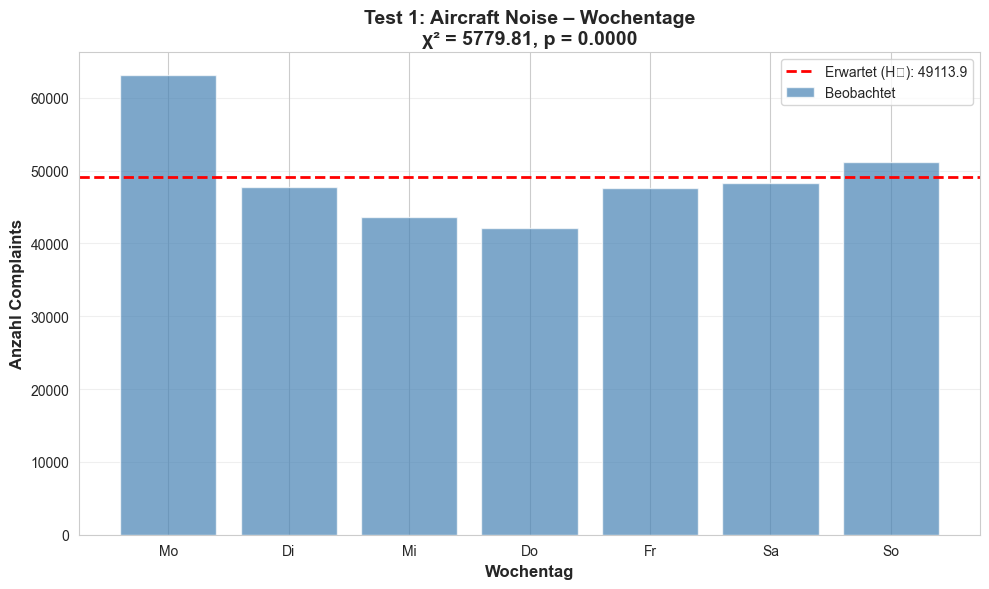

In [9]:
# Chi²-Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"""
Teststatistik:
--------------
χ² = {chi2_stat:.2f}
Freiheitsgrade: df = {n_days - 1}
p-Wert: {p_value:.4f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Die Aircraft Noise Complaints sind NICHT gleichverteilt über die Woche.")
    print(f"  Statistisch signifikanter Unterschied zwischen den Wochentagen.")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine ausreichende Evidenz gegen Gleichverteilung.")

# Visualisierung
fig, ax = plt.subplots(figsize=(10, 6))
days = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
x = np.arange(len(days))

ax.bar(x, observed, alpha=0.7, color='steelblue', label='Beobachtet')
ax.axhline(expected[0], color='red', linestyle='--', linewidth=2, label=f'Erwartet (H₀): {expected[0]:.1f}')

ax.set_xlabel('Wochentag', fontsize=12, fontweight='bold')
ax.set_ylabel('Anzahl Complaints', fontsize=12, fontweight='bold')
ax.set_title(f'Test 1: Aircraft Noise – Wochentage\nχ² = {chi2_stat:.2f}, p = {p_value:.4f}', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Interpretation: Wir können die H0 Hypothese verwerfen und sehen, dass pro Wochentag unterschiedliche Anzahl Beschwerden eingehen

**Test 2: Bee Wasp Removal**

H0 = Die Anzahl Bee/Wasp Removal pro Tag ist unter der Woche gleich wie am Wochenende.

H1 = Die Anzahl Bee/Wasp Removal pro Tag ist unterschiedlich am Wochenende oder unter der Woche.


In [22]:
bee_wasp_df = df[df['SR_SHORT_CODE'] == 'SGG'].copy()  # SGG steht für Bee/Wasp 
bee_wasp_df['Wochentag'] = bee_wasp_df['CREATED_DAY_OF_WEEK']
bee_wasp_df['Datum'] = bee_wasp_df['CREATED_DATE'].dt.date

# Requests pro Tag aggregieren
daily_counts = bee_wasp_df.groupby('Datum').agg({
    'SR_SHORT_CODE': 'count',
    'Wochentag': 'first'
}).rename(columns={'SR_SHORT_CODE': 'count', 'Wochentag': 'weekday'})

# Gruppen definieren
daily_counts['ist_werktag'] = daily_counts['weekday'] < 5  # Mo-Fr = Werktag
werktag = daily_counts[daily_counts['ist_werktag']]['count']
wochenende = daily_counts[~daily_counts['ist_werktag']]['count']

print(f"""
Daten:
------
Werktage:    n = {len(werktag)}, M = {werktag.mean():.2f}, SD = {werktag.std():.2f}
Wochenende:  n = {len(wochenende)}, M = {wochenende.mean():.2f}, SD = {wochenende.std():.2f}""")


bee_wasp_df.nunique()
bee_wasp_df.head()


Daten:
------
Werktage:    n = 140, M = 3.96, SD = 3.96
Wochenende:  n = 99, M = 3.49, SD = 3.30


,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,...,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION,Wochentag,Datum
2233,SR24-02335578,Bee/Wasp Removal,SGG,Streets and Sanitation,Streets and Sanitation,Completed,Salesforce Mobile App,2024-12-31 13:21:00,01/03/2025 01:56:06 PM,01/03/2025 01:56:06 PM,...,13,3,12,1.173809e+06,1.827354e+06,41.681673,-87.639399,"(41.68167300093973, -87.63939900000192)",3,2024-12-31
7577,SR24-02328988,Bee/Wasp Removal,SGG,Alderman,Streets and Sanitation,Completed,Phone Call,2024-12-30 12:09:50,01/02/2025 02:28:11 PM,01/02/2025 02:28:11 PM,...,12,2,12,1.138820e+06,1.942872e+06,41.999373,-87.764684,"(41.99937300094084, -87.76468350000191)",2,2024-12-30
10631,SR24-02325336,Bee/Wasp Removal,SGG,NaN,Streets and Sanitation,Completed,Mobile Device,2024-12-29 17:34:52,01/03/2025 01:55:21 PM,01/03/2025 01:55:21 PM,...,17,1,12,1.174625e+06,1.875553e+06,41.813919,-87.634980,"(41.813919000940196, -87.63498000000192)",1,2024-12-29
17632,SR24-02317578,Bee/Wasp Removal,SGG,NaN,Streets and Sanitation,Completed,Mobile Device,2024-12-27 16:45:50,01/02/2025 02:30:07 PM,01/02/2025 02:30:07 PM,...,16,6,12,1.167792e+06,1.923128e+06,41.944617,-87.658672,"(41.944617000940646, -87.6586725000019)",6,2024-12-27
17952,SR24-02317188,Bee/Wasp Removal,SGG,NaN,Streets and Sanitation,Completed,Mobile Device,2024-12-27 15:39:28,01/01/2025 05:07:44 PM,01/01/2025 05:07:44 PM,...,15,6,12,1.164771e+06,1.866285e+06,41.788701,-87.671390,"(41.78870100094013, -87.67138950000191)",6,2024-12-27



Teststatistik:
--------------
t = 0.982
p-Wert: 0.3273
Effektgröße: Cohen's d = 0.127

Interpretation (α = 0.05):
--------------------------

✗ p ≥ 0.05 → H₀ BEIBEHALTEN
  Keine ausreichende Evidenz für einen Unterschied.

Effektgröße: vernachlässigbar (|d| = 0.127)

Fazit: Nicht signifikant, aber Effekt ist vernachlässigbar.


C:\Users\katha\AppData\Local\Temp\ipykernel_12528\2962705449.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([werktag, wochenende], labels=['Werktag', 'Wochenende'], patch_artist=True,


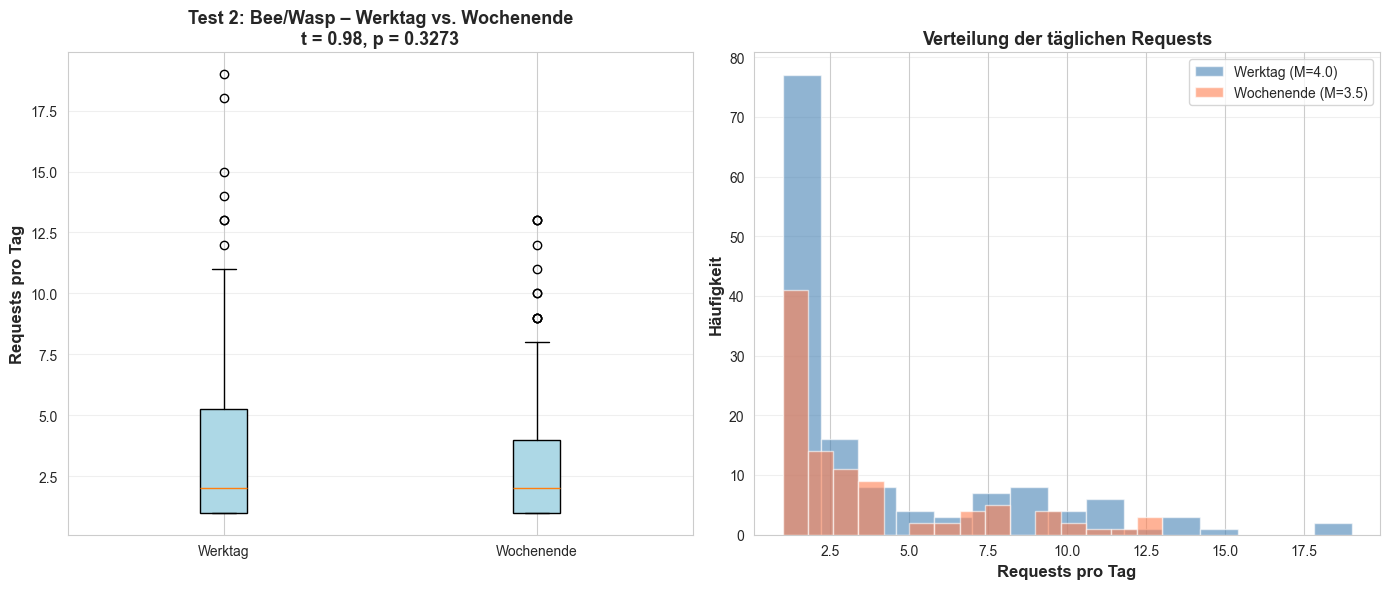

In [12]:
# 2-Sample t-Test (unabhängig, Welch's t-Test)
t_stat, p_value = stats.ttest_ind(werktag, wochenende, equal_var=False)

# Effektgröße: Cohen's d
pooled_std = np.sqrt((werktag.std()**2 + wochenende.std()**2) / 2)
cohens_d = (werktag.mean() - wochenende.mean()) / pooled_std

print(f"""
Teststatistik:
--------------
t = {t_stat:.3f}
p-Wert: {p_value:.4f}
Effektgröße: Cohen's d = {cohens_d:.3f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Statistisch signifikanter Unterschied zwischen Werktag und Wochenende.")
    print(f"  Differenz: {abs(werktag.mean() - wochenende.mean()):.2f} Requests/Tag")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine ausreichende Evidenz für einen Unterschied.")

# Effektgröße interpretieren
if abs(cohens_d) < 0.2:
    effect_label = "vernachlässigbar"
elif abs(cohens_d) < 0.5:
    effect_label = "klein"
elif abs(cohens_d) < 0.8:
    effect_label = "mittel"
else:
    effect_label = "groß"

print(f"\nEffektgröße: {effect_label} (|d| = {abs(cohens_d):.3f})")
print(f"\nFazit: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'}, aber Effekt ist {effect_label}.")

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
ax1.boxplot([werktag, wochenende], labels=['Werktag', 'Wochenende'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
ax1.set_ylabel('Requests pro Tag', fontsize=12, fontweight='bold')
ax1.set_title(f'Test 2: Bee/Wasp – Werktag vs. Wochenende\nt = {t_stat:.2f}, p = {p_value:.4f}',
              fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Histogramme
ax2.hist(werktag, alpha=0.6, bins=15, label=f'Werktag (M={werktag.mean():.1f})', color='steelblue')
ax2.hist(wochenende, alpha=0.6, bins=15, label=f'Wochenende (M={wochenende.mean():.1f})', color='coral')
ax2.set_xlabel('Requests pro Tag', fontsize=12, fontweight='bold')
ax2.set_ylabel('Häufigkeit', fontsize=12, fontweight='bold')
ax2.set_title("Verteilung der täglichen Requests", fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Interpretation:
Es gibt KEINE statistisch signifikante Evidenz für einen 
Unterschied zwischen Werktagen und Wochenende (p = 0.327 > 0.05).

Fazit: Bee/Wasp-Meldungen treten an Werktagen und am Wochenende 
       in ähnlichem Maße auf. → Kein zeitliches Muster erkennbar.

**TEST 3: Garbage Removal – Winter vs. Sommer (Requests pro Tag)**

H₀: Die durchschnittliche Anzahl Garbage-Requests pro Tag ist 
    im Winter gleich wie im Sommer.

H₁: Die durchschnittliche Anzahl unterscheidet sich.

In [23]:
garbage_df = df[df['SR_TYPE'].str.contains('Missed Garbage', case=False, na=False)].copy()
garbage_df['Datum'] = garbage_df['CREATED_DAY_OF_WEEK']
garbage_df['Monat'] = garbage_df['CREATED_MONTH']

# Jahreszeiten definieren (Nordhalbkugel)
# Winter: Dez, Jan, Feb (12, 1, 2)
# Sommer: Jun, Jul, Aug (6, 7, 8)
garbage_df['Saison'] = garbage_df['Monat'].apply(
    lambda m: 'Winter' if m in [12, 1, 2] else ('Sommer' if m in [6, 7, 8] else 'Andere')
)

# Nur Winter und Sommer betrachten
seasonal = garbage_df[garbage_df['Saison'].isin(['Winter', 'Sommer'])]

# Requests pro Tag aggregieren
daily_seasonal = seasonal.groupby(['Datum', 'Saison']).size().reset_index(name='count')

winter = daily_seasonal[daily_seasonal['Saison'] == 'Winter']['count']
sommer = daily_seasonal[daily_seasonal['Saison'] == 'Sommer']['count']

print(f"""
Daten:
------
Winter:  n = {len(winter)}, M = {winter.mean():.2f}, SD = {winter.std():.2f}
Sommer:  n = {len(sommer)}, M = {sommer.mean():.2f}, SD = {sommer.std():.2f}
""")
garbage_df.head()

garbage_df.nunique()



Daten:
------
Winter:  n = 7, M = 299.29, SD = 123.24
Sommer:  n = 7, M = 373.14, SD = 153.36



SR_NUMBER                   7722
SR_TYPE                        1
SR_SHORT_CODE                  1
CREATED_DEPARTMENT             4
OWNER_DEPARTMENT               1
STATUS                         3
ORIGIN                         8
CREATED_DATE                7705
LAST_MODIFIED_DATE          7424
CLOSED_DATE                 7420
STREET_ADDRESS              6284
CITY                           1
STATE                          2
ZIP_CODE                      57
STREET_NUMBER               3968
STREET_DIRECTION               4
STREET_NAME                  795
STREET_TYPE                   12
DUPLICATE                      2
LEGACY_RECORD                  1
LEGACY_SR_NUMBER               0
PARENT_SR_NUMBER             119
COMMUNITY_AREA                77
WARD                          50
ELECTRICAL_DISTRICT            6
ELECTRICITY_GRID             737
POLICE_SECTOR                  3
POLICE_DISTRICT               22
POLICE_BEAT                  264
PRECINCT                      57
SANITATION


Teststatistik:
--------------
t = -0.993
p-Wert: 0.3411
Effektgröße: Cohen's d = -0.531

Interpretation (α = 0.05):
--------------------------

✗ p ≥ 0.05 → H₀ BEIBEHALTEN
  Keine ausreichende Evidenz für einen Unterschied.

Effektgröße: mittel (|d| = 0.531)

Fazit: Nicht signifikant, Effekt ist mittel.


C:\Users\katha\AppData\Local\Temp\ipykernel_12528\2698143372.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([winter, sommer], labels=['Winter', 'Sommer'], patch_artist=True,


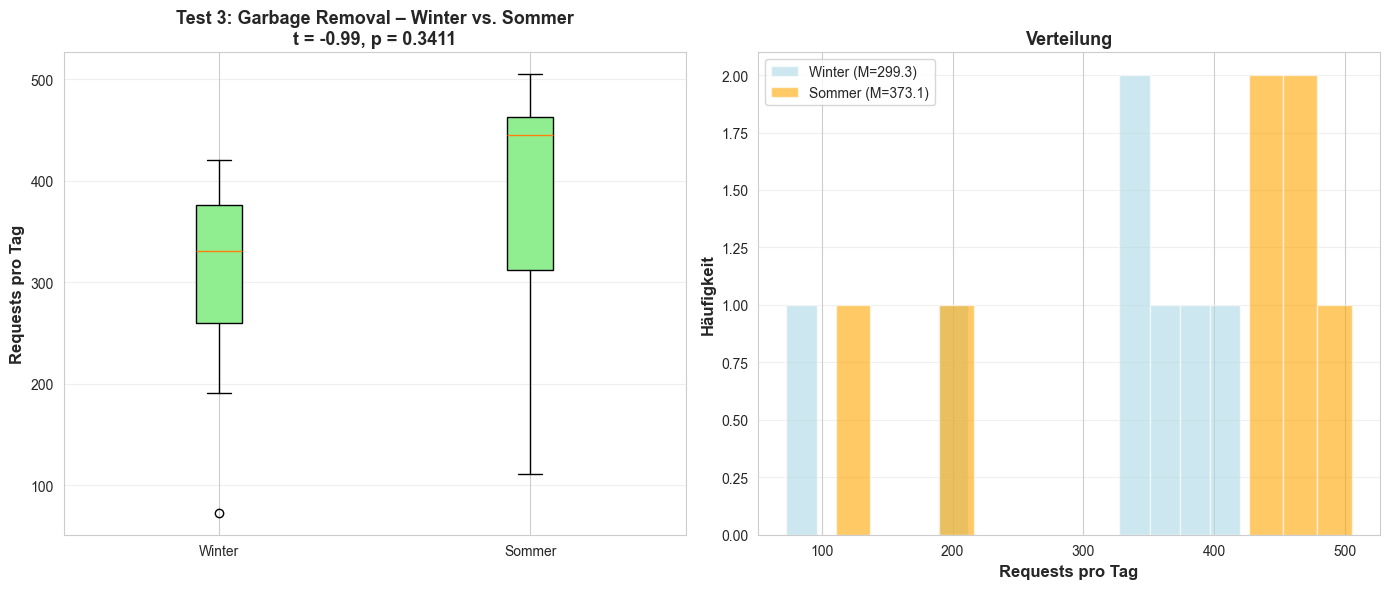

In [24]:
# 2-Sample t-Test
t_stat, p_value = stats.ttest_ind(winter, sommer, equal_var=False)

# Effektgröße
pooled_std = np.sqrt((winter.std()**2 + sommer.std()**2) / 2)
cohens_d = (winter.mean() - sommer.mean()) / pooled_std

print(f"""
Teststatistik:
--------------
t = {t_stat:.3f}
p-Wert: {p_value:.4f}
Effektgröße: Cohen's d = {cohens_d:.3f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Statistisch signifikanter Unterschied zwischen Winter und Sommer.")
    print(f"  Differenz: {abs(winter.mean() - sommer.mean()):.2f} Requests/Tag")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine ausreichende Evidenz für einen Unterschied.")

# Effektgröße
if abs(cohens_d) < 0.2:
    effect_label = "vernachlässigbar"
elif abs(cohens_d) < 0.5:
    effect_label = "klein"
elif abs(cohens_d) < 0.8:
    effect_label = "mittel"
else:
    effect_label = "groß"

print(f"\nEffektgröße: {effect_label} (|d| = {abs(cohens_d):.3f})")
print(f"\nFazit: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'}, Effekt ist {effect_label}.")

# Visualisierung
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].boxplot([winter, sommer], labels=['Winter', 'Sommer'], patch_artist=True,
              boxprops=dict(facecolor='lightgreen'))
ax[0].set_ylabel('Requests pro Tag', fontsize=12, fontweight='bold')
ax[0].set_title(f'Test 3: Garbage Removal – Winter vs. Sommer\nt = {t_stat:.2f}, p = {p_value:.4f}',
                fontsize=13, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)

ax[1].hist(winter, alpha=0.6, bins=15, label=f'Winter (M={winter.mean():.1f})', color='lightblue')
ax[1].hist(sommer, alpha=0.6, bins=15, label=f'Sommer (M={sommer.mean():.1f})', color='orange')
ax[1].set_xlabel('Requests pro Tag', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Häufigkeit', fontsize=12, fontweight='bold')
ax[1].set_title("Verteilung", fontsize=13, fontweight='bold')
ax[1].legend()
ax[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation**

Wir sehen wieder, dass der P Wert zu hoch ist dass wir die H0 Hypothese verwerfen könnten

Da wir nur bei dem SR Type Aircraft Noise Complaint einen richtigen Unterschied in der Verteilung gesehen haben, fahrne wir mit diesem SR Type vor. 

Wir prüfen jetzt nicht nur auf den CREATED_DAY_OF_WEEK sondern jetzt auch auf CREATED_MONTH und CREATED_HOUR

**TEST 4: Aircraft Noise – Geschäftszeiten vs. Nach**

H₀: Die durchschnittliche Anzahl Aircraft Noise Complaints pro Stunde ist tagsüber (8-18 Uhr) gleich wie nachts (22-6 Uhr).

H₁: Die durchschnittliche Anzahl unterscheidet sich.

In [25]:
# Daten vorbereiten
aircraft_hour_df = df[df['SR_TYPE'] == 'Aircraft Noise Complaint'].copy()
aircraft_hour_df['Stunde'] = aircraft_hour_df['CREATED_HOUR']
aircraft_hour_df['Datum'] = aircraft_hour_df['CREATED_DATE']

# Stündliche Aggregation: Complaints pro Stunde pro Tag
hourly_agg = aircraft_hour_df.groupby(['Datum', 'Stunde']).size().reset_index(name='count')

# Gruppen definieren
# Tag: 8-18 Uhr (Geschäftszeiten)
# Nacht: 22-23 Uhr + 0-6 Uhr
tag = hourly_agg[hourly_agg['Stunde'].between(8, 18)]['count']
nacht = hourly_agg[hourly_agg['Stunde'].isin(list(range(22, 24)) + list(range(0, 7)))]['count']

print(f"""

Daten:
------
Tag (8-18h):   n = {len(tag)}, M = {tag.mean():.2f}, SD = {tag.std():.2f}
Nacht (22-6h): n = {len(nacht)}, M = {nacht.mean():.2f}, SD = {nacht.std():.2f}
""")




Daten:
------
Tag (8-18h):   n = 211621, M = 1.00, SD = 0.07
Nacht (22-6h): n = 39569, M = 1.00, SD = 0.07




Teststatistik:
--------------
t = 0.450
p-Wert: 0.6526
Effektgröße: Cohen's d = 0.002

Interpretation (α = 0.05):
--------------------------

✗ p ≥ 0.05 → H₀ BEIBEHALTEN
  Keine ausreichende Evidenz für einen Unterschied.

Effektgröße: vernachlässigbar (|d| = 0.002)

Fazit: Nicht signifikant, Effekt ist vernachlässigbar.


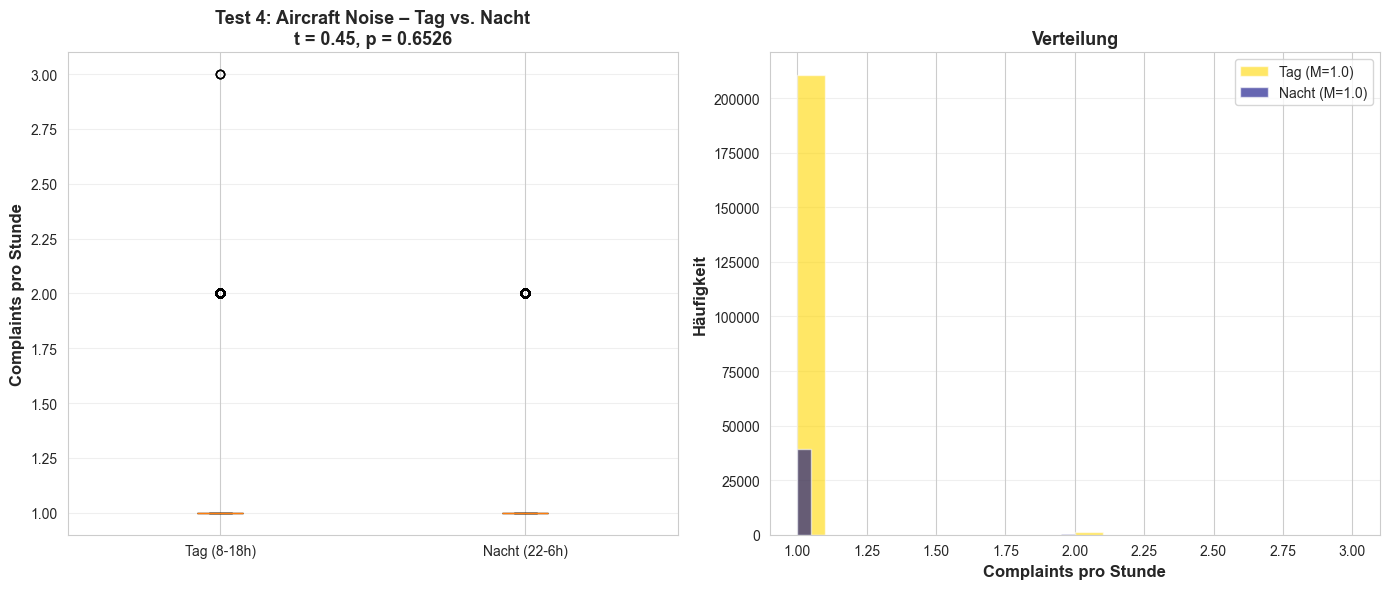

In [26]:

# t-Test
t_stat, p_value = stats.ttest_ind(tag, nacht, equal_var=False)

# Effektgröße
pooled_std = np.sqrt((tag.std()**2 + nacht.std()**2) / 2)
cohens_d = (tag.mean() - nacht.mean()) / pooled_std

print(f"""
Teststatistik:
--------------
t = {t_stat:.3f}
p-Wert: {p_value:.4f}
Effektgröße: Cohen's d = {cohens_d:.3f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Statistisch signifikanter Unterschied zwischen Tag und Nacht.")
    print(f"  Differenz: {abs(tag.mean() - nacht.mean()):.2f} Complaints/Stunde")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine ausreichende Evidenz für einen Unterschied.")

# Effektgröße
if abs(cohens_d) < 0.2:
    effect_label = "vernachlässigbar"
elif abs(cohens_d) < 0.5:
    effect_label = "klein"
elif abs(cohens_d) < 0.8:
    effect_label = "mittel"
else:
    effect_label = "groß"

print(f"\nEffektgröße: {effect_label} (|d| = {abs(cohens_d):.3f})")
print(f"\nFazit: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'}, Effekt ist {effect_label}.")

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
ax1.boxplot([tag, nacht], tick_labels=['Tag (8-18h)', 'Nacht (22-6h)'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'))
ax1.set_ylabel('Complaints pro Stunde', fontsize=12, fontweight='bold')
ax1.set_title(f'Test 4: Aircraft Noise – Tag vs. Nacht\nt = {t_stat:.2f}, p = {p_value:.4f}',
              fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Histogramme
ax2.hist(tag, alpha=0.6, bins=20, label=f'Tag (M={tag.mean():.1f})', color='gold')
ax2.hist(nacht, alpha=0.6, bins=20, label=f'Nacht (M={nacht.mean():.1f})', color='navy')
ax2.set_xlabel('Complaints pro Stunde', fontsize=12, fontweight='bold')
ax2.set_ylabel('Häufigkeit', fontsize=12, fontweight='bold')
ax2.set_title("Verteilung", fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

TEST 5: Aircraft Noise – Gleichverteilung über 12 Monate?
H₀: Aircraft Noise Complaints sind gleichverteilt über alle 12 Monate (jeder Monat hat P = 1/12 ≈ 8.33%)

H₁: Mindestens ein Monat weicht von der Gleichverteilung ab (es gibt saisonale Unterschiede)

In [28]:
# Daten vorbereiten
aircraft_month_df = df[df['SR_TYPE'] == 'Aircraft Noise Complaint'].copy()
aircraft_month_df['Monat'] = aircraft_month_df['CREATED_MONTH']

# Observed counts
observed = aircraft_month_df['Monat'].value_counts().sort_index().values
n_total = observed.sum()
n_months = 12

# Expected counts (Gleichverteilung)
expected = np.array([n_total / n_months] * n_months)

month_names_full = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

print(f"""

Daten:
------
Gesamtanzahl: {n_total}
Erwartete Anzahl pro Monat (bei H₀): {expected[0]:.1f}
""")

aircraft_month_df.head()
aircraft_month_df.nunique()



Daten:
------
Gesamtanzahl: 343797
Erwartete Anzahl pro Monat (bei H₀): 28649.8



SR_NUMBER                   343797
SR_TYPE                          1
SR_SHORT_CODE                    1
CREATED_DEPARTMENT               2
OWNER_DEPARTMENT                 1
STATUS                           1
ORIGIN                           4
CREATED_DATE                342038
LAST_MODIFIED_DATE           29497
CLOSED_DATE                 341973
STREET_ADDRESS                  40
CITY                             1
STATE                            1
ZIP_CODE                        17
STREET_NUMBER                   38
STREET_DIRECTION                 3
STREET_NAME                     36
STREET_TYPE                      5
DUPLICATE                        1
LEGACY_RECORD                    1
LEGACY_SR_NUMBER                 0
PARENT_SR_NUMBER                 0
COMMUNITY_AREA                  22
WARD                            18
ELECTRICAL_DISTRICT              0
ELECTRICITY_GRID                36
POLICE_SECTOR                    4
POLICE_DISTRICT                 10
POLICE_BEAT         


Teststatistik:
--------------
χ² = 7514.60
Freiheitsgrade: df = 11
p-Wert: 0.0000

Interpretation (α = 0.05):
--------------------------

✓ p < 0.05 → H₀ VERWERFEN
  Die Aircraft Noise Complaints sind NICHT gleichverteilt über die Monate.
  Es gibt signifikante saisonale Unterschiede.

  Stärkste Abweichung: Feb (-25.7%)


C:\Users\katha\AppData\Local\Temp\ipykernel_12528\2894065580.py:56: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\katha\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


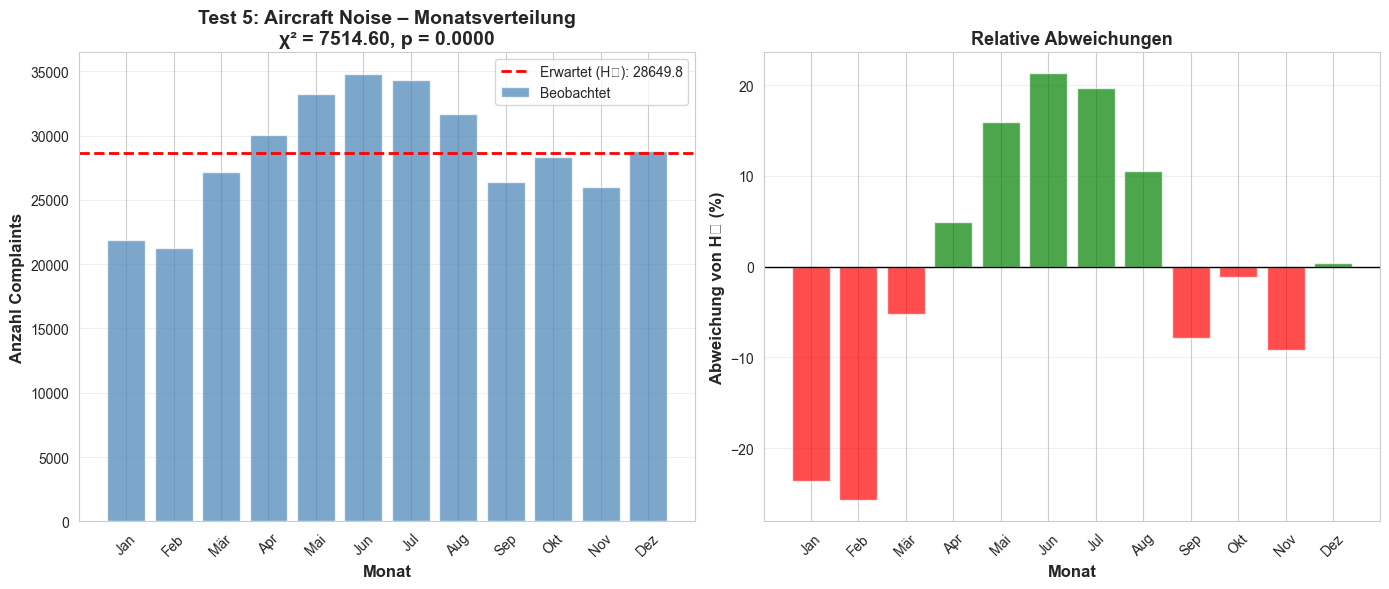

In [29]:
# Chi²-Test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"""
Teststatistik:
--------------
χ² = {chi2_stat:.2f}
Freiheitsgrade: df = {n_months - 1}
p-Wert: {p_value:.4f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Die Aircraft Noise Complaints sind NICHT gleichverteilt über die Monate.")
    print(f"  Es gibt signifikante saisonale Unterschiede.")
    
    # Welche Monate weichen am stärksten ab?
    deviations = (observed - expected) / expected * 100
    max_idx = np.argmax(np.abs(deviations))
    print(f"\n  Stärkste Abweichung: {month_names_full[max_idx]} ({deviations[max_idx]:+.1f}%)")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine ausreichende Evidenz gegen Gleichverteilung.")

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Balkendiagramm: Beobachtet vs. Erwartet
x = np.arange(n_months)
ax1.bar(x, observed, alpha=0.7, color='steelblue', label='Beobachtet')
ax1.axhline(expected[0], color='red', linestyle='--', linewidth=2, label=f'Erwartet (H₀): {expected[0]:.1f}')
ax1.set_xlabel('Monat', fontsize=12, fontweight='bold')
ax1.set_ylabel('Anzahl Complaints', fontsize=12, fontweight='bold')
ax1.set_title(f'Test 5: Aircraft Noise – Monatsverteilung\nχ² = {chi2_stat:.2f}, p = {p_value:.4f}', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(month_names_full, rotation=45)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Abweichungen in Prozent
deviations = (observed - expected) / expected * 100
colors = ['red' if d < 0 else 'green' for d in deviations]
ax2.bar(x, deviations, color=colors, alpha=0.7)
ax2.axhline(0, color='black', linewidth=1)
ax2.set_xlabel('Monat', fontsize=12, fontweight='bold')
ax2.set_ylabel('Abweichung von H₀ (%)', fontsize=12, fontweight='bold')
ax2.set_title('Relative Abweichungen', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(month_names_full, rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Wir sehen einen signifikanten Unterschied zwischen den Sommer und Wintermethoden. 

Jetzt versuchen wir herauszufinden, warum im Sommer mehr Noise Complaints als im Winter eintreffen. 

Dazu nehmen wir das Bureau of Transportation von den USA (Link: https://www.transtats.bts.gov/Data_Elements.aspx?Data=1) Dieser listet alle Flüge die von den Flughäfen aus losfliegen nach Monaten sortiert. 

In diesem haben wir nach den zwei Flughäfen in Chicago: O'Hare und Midway gesucht. Jetzt wollen wir testen, ob die Noise Complaints im Sommer mehr werden, weil mehr Flüge von den Flughäfen fliegen. 

Wir testen Korrelation zwischen Flugverkehr und Complaints.

Fragestellung:

Erklärt die Anzahl der Flüge die saisonale Variation der Complaints?

H₀: ρ = 0
    Es gibt KEINE Korrelation zwischen Flugverkehr und Aircraft Noise Complaints.

H₁: ρ ≠ 0
    Es gibt eine lineare Korrelation (mehr Flüge → mehr Complaints).


In [30]:
# Korrelationsanalyse
from scipy.stats import pearsonr, linregress

flight_data = pd.DataFrame({
    'Month': range(1, 13),
    'Midway': [590014, 627530, 882598, 858001, 956406, 1053740, 
               1111353, 971474, 907104, 886733, 758648, 783065],
    'OHare': [2399064, 2520741, 3105192, 3059133, 3503239, 3600837,
              3645813, 3660310, 3399832, 3480444, 3013263, 3232061],
})

# Gesamtflüge pro Monat
flight_data['Total_Flights'] = flight_data['Midway'] + flight_data['OHare']

# Aircraft Noise Complaints aus Test 5
complaints_by_month = aircraft_month_df['Monat'].value_counts().sort_index()

df_combined = pd.DataFrame({
    'Monat': range(1, 13),
    'Complaints': complaints_by_month.values,
    'Flights': flight_data['Total_Flights'].values
})

# Monatsnamen für Plots
month_names_full = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

print(f"""Daten:      
------
Flugdaten: BTS (Bureau of Transportation Statistics)
- Chicago O'Hare (ORD) + Midway (MDW)
- Total Operations pro Monat (2024)
Monat mit meisten Flügen: {month_names_full[flight_data['Total_Flights'].idxmax()]} ({flight_data['Total_Flights'].max():,})
Monat mit wenigsten Flügen: {month_names_full[flight_data['Total_Flights'].idxmin()]} ({flight_data['Total_Flights'].min():,})
""")

# Pearson-Korrelation
correlation, p_value_corr = pearsonr(df_combined['Flights'], df_combined['Complaints'])

# Lineare Regression
slope, intercept, r_value, p_value_reg, std_err = linregress(
    df_combined['Flights'], 
    df_combined['Complaints'])

print(f"""
Teststatistik:
--------------
Pearson-Korrelation: r = {correlation:.3f}
Bestimmtheitsmaß: R² = {r_value**2:.3f}
p-Wert: {p_value_corr:.4f}

Lineare Regression:
-------------------
y = {slope:.4f}x + {intercept:.1f}
Steigung: {slope:.4f} (pro zusätzlichem Flug → {slope:.4f} mehr Complaints)
R² = {r_value**2:.3f} ({r_value**2*100:.1f}% der Varianz erklärt)
p-Wert: {p_value_reg:.4f}

Interpretation (α = 0.05):
--------------------------
""")

if p_value_corr < 0.05:
    print(f"✓ p < 0.05 → H₀ VERWERFEN")
    print(f"  Es gibt eine statistisch signifikante Korrelation!")
    
    if correlation > 0:
        print(f"\n  → POSITIVER Zusammenhang: Mehr Flüge = mehr Complaints")
    else:
        print(f"\n  → NEGATIVER Zusammenhang: Mehr Flüge = weniger Complaints")
    
    # Stärke der Korrelation interpretieren
    if abs(correlation) < 0.3:
        strength = "schwach"
    elif abs(correlation) < 0.7:
        strength = "mittel"
    else:
        strength = "stark"
    
    print(f"  Korrelationsstärke: {strength} (|r| = {abs(correlation):.3f})")
else:
    print(f"✗ p ≥ 0.05 → H₀ BEIBEHALTEN")
    print(f"  Keine statistisch signifikante Korrelation.")

print(f"""
Fazit:
------
{r_value**2*100:.1f}% der Varianz in Aircraft Noise Complaints wird 
durch die Anzahl der Flugbewegungen erklärt.

{'→ Die saisonalen Unterschiede sind KAUSAL mit Flugverkehr verbunden!' if p_value_corr < 0.05 else '→ Die Complaints variieren unabhängig vom Flugverkehr.'}
""")

Daten:      
------
Flugdaten: BTS (Bureau of Transportation Statistics)
- Chicago O'Hare (ORD) + Midway (MDW)
- Total Operations pro Monat (2024)
Monat mit meisten Flügen: Jul (4,757,166)
Monat mit wenigsten Flügen: Jan (2,989,078)


Teststatistik:
--------------
Pearson-Korrelation: r = 0.905
Bestimmtheitsmaß: R² = 0.819
p-Wert: 0.0001

Lineare Regression:
-------------------
y = 0.0070x + -77.5
Steigung: 0.0070 (pro zusätzlichem Flug → 0.0070 mehr Complaints)
R² = 0.819 (81.9% der Varianz erklärt)
p-Wert: 0.0001

Interpretation (α = 0.05):
--------------------------

✓ p < 0.05 → H₀ VERWERFEN
  Es gibt eine statistisch signifikante Korrelation!

  → POSITIVER Zusammenhang: Mehr Flüge = mehr Complaints
  Korrelationsstärke: stark (|r| = 0.905)

Fazit:
------
81.9% der Varianz in Aircraft Noise Complaints wird 
durch die Anzahl der Flugbewegungen erklärt.

→ Die saisonalen Unterschiede sind KAUSAL mit Flugverkehr verbunden!



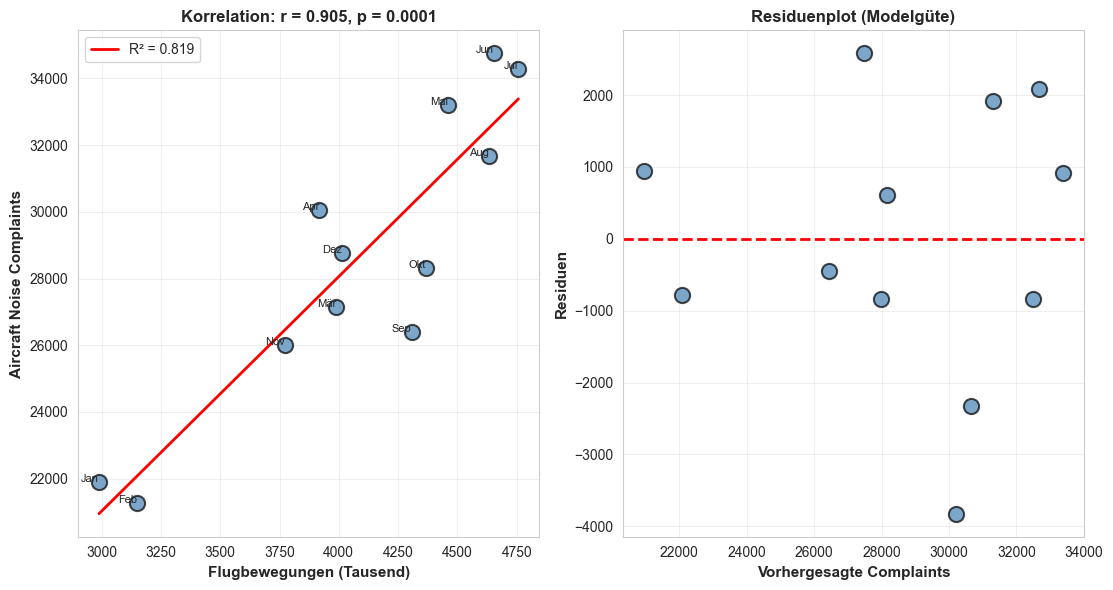

In [32]:
# Visualisierung
fig = plt.figure(figsize=(16, 6))

# Plot 1: Scatterplot mit Regressionslinie
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(df_combined['Flights'] / 1000, df_combined['Complaints'], 
           s=120, alpha=0.7, color='steelblue', edgecolors='black', linewidth=1.5)

# Regressionslinie
x_pred = np.linspace(df_combined['Flights'].min(), df_combined['Flights'].max(), 100)
y_pred = intercept + slope * x_pred
ax2.plot(x_pred / 1000, y_pred, color='red', linewidth=2, 
         label=f'R² = {r_value**2:.3f}')

# Monatsbeschriftungen
for i, txt in enumerate(month_names_full):
    ax2.annotate(txt, (df_combined['Flights'].iloc[i] / 1000, 
                       df_combined['Complaints'].iloc[i]),
                fontsize=8, ha='right')

ax2.set_xlabel('Flugbewegungen (Tausend)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Aircraft Noise Complaints', fontsize=11, fontweight='bold')
ax2.set_title(f'Korrelation: r = {correlation:.3f}, p = {p_value_corr:.4f}', 
             fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 2: Residuen (wie gut passt die Regression?)
ax3 = plt.subplot(1, 3, 3)
predicted = intercept + slope * df_combined['Flights']
residuals = df_combined['Complaints'] - predicted

ax3.scatter(predicted, residuals, s=120, alpha=0.7, 
           color='steelblue', edgecolors='black', linewidth=1.5)
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Vorhergesagte Complaints', fontsize=11, fontweight='bold')
ax3.set_ylabel('Residuen', fontsize=11, fontweight='bold')
ax3.set_title('Residuenplot (Modelgüte)', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()